In [ ]:
import osmnx as ox
print("OSMNX version:", ox.__version__)
print("Has geometries_from_place:", hasattr(ox, "geometries_from_place"))

In [2]:
!conda install -c conda-forge osmnx geopandas matplotlib jupyterlab -y


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3\envs\barcelona_env

  added / updated specs:
    - geopandas
    - jupyterlab
    - matplotlib
    - osmnx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argon2-cffi-bindings-21.2.0|  py311he736701_5          34 KB  conda-forge
    blosc-1.21.6               |       h85f69ea_0          49 KB  conda-forge
    brotli-python-1.1.0        |  py311hda3d55a_3         314 KB  conda-forge
    cffi-1.17.1                |  py311he736701_0         291 KB  conda-forge
    contourpy-1.3.2            |  py311h3257749_0         212 KB  conda-forge
    cpython-3.11.13            |  py311hd8ed1ab_0          46 KB  conda-forge
    debugpy-1.8.14             |  py311hda3d55a_0         3.4 MB  conda-forge
    expat-2.7.0                |      

In [1]:
!pip install geopandas osmnx shapely matplotlib


  Using cached pyproj-3.7.1-cp313-cp313-win_amd64.whl.metadata (31 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 504.4 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.7 MB 504.4 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.7 MB 504.4 kB/s eta 0:00:03
   ------------------ --------------------- 0.8/1.7 MB 507.1 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 507.1 kB/s eta 0:00:02
   

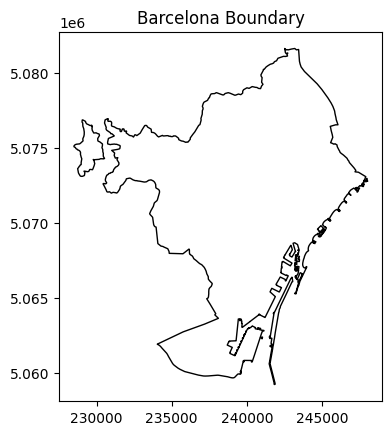

In [2]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import matplotlib.pyplot as plt

# Get boundary polygon of Barcelona
barcelona_boundary = ox.geocode_to_gdf("Barcelona, Spain")
barcelona_boundary = barcelona_boundary.to_crs(epsg=3857)  # use meters

# Visual check
barcelona_boundary.plot(edgecolor='black', facecolor='none')
plt.title("Barcelona Boundary")
plt.show()


In [4]:
# Download street network and buildings
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import matplotlib.pyplot as plt
G = ox.graph_from_place("Barcelona, Spain", network_type="drive")
streets = ox.graph_to_gdfs(G, nodes=False, edges=True)
buildings = ox.geometries_from_place("Barcelona, Spain", tags={"building": True})
buildings = buildings.to_crs(epsg=3857)


AttributeError: module 'osmnx' has no attribute 'geometries_from_place'

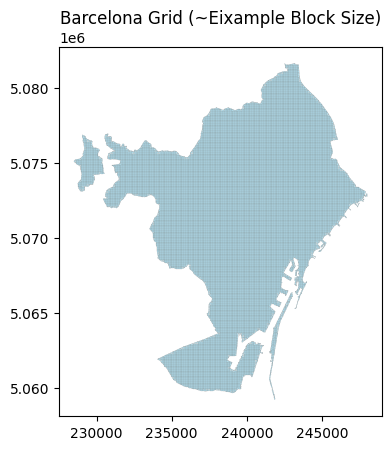

In [5]:
# Define grid size (meters)
grid_size = 113

# Get boundary box of the city
minx, miny, maxx, maxy = barcelona_boundary.total_bounds

# Generate square grid cells
cells = []
for x in np.arange(minx, maxx, grid_size):
    for y in np.arange(miny, maxy, grid_size):
        cell = box(x, y, x + grid_size, y + grid_size)
        cells.append(cell)

# Convert to GeoDataFrame
grid = gpd.GeoDataFrame(geometry=cells, crs=barcelona_boundary.crs)

# Clip to actual city boundary
grid = gpd.overlay(grid, barcelona_boundary, how="intersection")
grid["cell_id"] = range(len(grid))

# Plot the result
grid.plot(edgecolor="grey", facecolor="lightblue", linewidth=0.1)
plt.title("Barcelona Grid (~Eixample Block Size)")
plt.show()


In [6]:
print(grid.head())


   bbox_west  bbox_south  bbox_east  bbox_north  place_id  osm_type  osm_id  \
0   2.052498   41.317035   2.228356   41.467914  76094835  relation  347950   
1   2.052498   41.317035   2.228356   41.467914  76094835  relation  347950   
2   2.052498   41.317035   2.228356   41.467914  76094835  relation  347950   
3   2.052498   41.317035   2.228356   41.467914  76094835  relation  347950   
4   2.052498   41.317035   2.228356   41.467914  76094835  relation  347950   

        lat       lon     class            type  place_rank  importance  \
0  41.38258  2.177073  boundary  administrative          16    0.794196   
1  41.38258  2.177073  boundary  administrative          16    0.794196   
2  41.38258  2.177073  boundary  administrative          16    0.794196   
3  41.38258  2.177073  boundary  administrative          16    0.794196   
4  41.38258  2.177073  boundary  administrative          16    0.794196   

  addresstype       name                                       display_nam

In [8]:
!pip install --upgrade osmnx


In [1]:
# 1. Imports
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import matplotlib.pyplot as plt

# 2. Get Barcelona boundary
barcelona = ox.geocode_to_gdf("Barcelona, Spain").to_crs(epsg=3857)

# 3. Download streets and buildings
G = ox.graph_from_place("Barcelona, Spain", network_type="drive")
streets = ox.graph_to_gdfs(G, nodes=False, edges=True)

buildings = ox.geometries_from_place("Barcelona, Spain", tags={"building": True})
buildings = buildings.to_crs(epsg=3857)

# 4. Create grid (adjust grid_size as needed)
grid_size = 113  # Eixample block size in meters
minx, miny, maxx, maxy = barcelona.total_bounds
cells = []

for x in np.arange(minx, maxx, grid_size):
    for y in np.arange(miny, maxy, grid_size):
        cell = box(x, y, x + grid_size, y + grid_size)
        cells.append(cell)

grid = gpd.GeoDataFrame(geometry=cells, crs=barcelona.crs)
grid = gpd.overlay(grid, barcelona, how="intersection")
grid["cell_id"] = range(len(grid))

# 5. Plot everything
fig, ax = plt.subplots(figsize=(12, 12))

# Plot layers
buildings.plot(ax=ax, facecolor="lightgray", edgecolor="none", alpha=0.6)
streets.plot(ax=ax, linewidth=0.5, color="black", alpha=0.5)
grid.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=0.4)
barcelona.boundary.plot(ax=ax, color="blue", linewidth=1)

# Optional zoom: Uncomment and adjust to focus on Eixample
# ax.set_xlim(430000, 431500)  
# ax.set_ylim(4580000, 4581500)

plt.title(f"Barcelona Grid Visualization (Grid Size = {grid_size} m)")
plt.axis("off")
plt.tight_layout()
plt.show()


AttributeError: module 'osmnx' has no attribute 'geometries_from_place'

In [1]:
import osmnx as ox
print(ox.__version__)


2.0.4


In [2]:
import osmnx as ox
print(ox.__version__)  # should print 2.0.4

tags = {"building": True}
gdf = ox.geometries_from_place("Barcelona, Spain", tags=tags)
print(gdf.head())


2.0.4


AttributeError: module 'osmnx' has no attribute 'geometries_from_place'

In [3]:
print(hasattr(ox, "geometries_from_place"))


False


In [4]:
!pip uninstall osmnx -y
!pip install osmnx==2.0.4
import osmnx as ox
print(ox.__version__)  # should print 2.0.4
print(hasattr(ox, "geometries_from_place"))  # Must be True

Found existing installation: osmnx 2.0.4
Uninstalling osmnx-2.0.4:
  Successfully uninstalled osmnx-2.0.4
  Using cached osmnx-2.0.4-py3-none-any.whl.metadata (4.9 kB)
Using cached osmnx-2.0.4-py3-none-any.whl (100 kB)
2.0.4
False


In [5]:
import osmnx as ox
print("OSMNX version:", ox.__version__)
print("Loaded from:", ox.__file__)
print("Has geometries_from_place:", hasattr(ox, "geometries_from_place"))


OSMNX version: 2.0.4
Loaded from: c:\Users\DELL\anaconda3\envs\hackathon2.0_env\Lib\site-packages\osmnx\__init__.py
Has geometries_from_place: False


In [6]:
C:\Users\DELL\anaconda3\envs\hackathon2.0_env\lib\site-packages\osmnx\__init__.py


SyntaxError: unexpected character after line continuation character (862960317.py, line 1)

In [7]:
!conda create -n barcelona_env python=3.11 -y
!conda activate barcelona_env


Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3\envs\barcelona_env

  added / updated specs:
    - python=3.11


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    expat-2.7.1                |       h8ddb27b_0         259 KB
    pip-25.1                   |     pyhc872135_2         1.3 MB
    python-3.11.13             |       h981015d_0        18.7 MB
    setuptools-78.1.1          |  py311haa95532_0         2.3 MB
    tk-8.6.14                  |       h5e9d12e_1         3.5 MB
    tzdata-2025b               |       h04d1e81_0         116 KB
    wheel-0.45.1               |  py311haa95532_0         182 KB
    ------------------------------------------------------------
                                           Total:        26.2 MB

The following NEW packages will 

In [8]:
!conda install -c conda-forge osmnx geopandas matplotlib jupyterlab -y


^C
